<a href="https://colab.research.google.com/github/kalebsampaco/Python-y-scikit-learn/blob/master/Construyendo_un_modelo_Clasificador_de_im%C3%A1genes_Pytroch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

from torchvision import utils
from torchvision import datasets
from torchvision import transforms

from PIL import Image
import urllib.request as request
from matplotlib import pyplot as plt
#torch.set_printoptions(edgeitems=2) #default 3
#torch.manual_seed(123)

# Construyendo modelo
---



In [2]:
data_path = 'data/'
full_data_set = datasets.CIFAR10(data_path, train=True, download=True,
                          transform=transforms.Compose([
                              transforms.ToTensor(),
                              transforms.Normalize((0.4915, 0.4823, 0.4468),
                                                   (0.2470, 0.2435, 0.2616))
                          ]))

full_validation_set = datasets.CIFAR10(data_path, train=False, download=True,
                          transform=transforms.Compose([
                              transforms.ToTensor(),
                              transforms.Normalize((0.4915, 0.4823, 0.4468),
                                                   (0.2470, 0.2435, 0.2616))
                          ]))

Extracting data/cifar-10-python.tar.gz to data/
Files already downloaded and verified


In [4]:
size = 4
dataloader = torch.utils.data.DataLoader(full_data_set, batch_size=size, shuffle=True, num_workers=2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


bird
cat
cat
dog


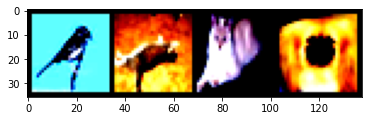

In [5]:
data_iterator = iter(dataloader)
imgs, labels = data_iterator.next()

classes = ['plane','car','bird','cat','deer','dog','frog','horse','ship','truck']

plt.imshow(utils.make_grid(imgs).permute(1, 2, 0))

for i in range(size):
  print(classes[labels[i]])

In [7]:
#classes = ['plane','car','bird','cat','deer','dog','frog','horse','ship','truck']
class_names = ['car', 'cat']

label_map = {1: 0, 3: 1}

data_set = [(img, label_map[label]) for img, label in full_data_set if label in [1, 3]]
validation_set = [(img, label_map[label]) for img, label in full_validation_set if label in [1, 3]]

In [8]:
img, label = data_set[20]
img.shape

torch.Size([3, 32, 32])

In [9]:
model = nn.Sequential(
            nn.Linear(3 * 32 * 32, 512),
            nn.Tanh(),
            nn.Linear(512, 2))

In [10]:
def sigmoid(x):
  return 1 / (1 + torch.exp(-x))

In [11]:
x = torch.tensor([1.0, 2.0, 3.0])

sigmoid(x)

tensor([0.7311, 0.8808, 0.9526])

In [12]:
sigmoid(x).sum()

tensor(2.5644)

In [13]:
def softmax(x):
    return torch.exp(x) / torch.exp(x).sum()

In [14]:
softmax(x)

tensor([0.0900, 0.2447, 0.6652])

In [15]:
softmax(x).sum()

tensor(1.)

In [16]:
softmax = nn.Softmax(dim=1)

x = torch.tensor([[1.0, 2.0, 3.0],
                  [1.0, 2.0, 3.0]])

softmax(x)

tensor([[0.0900, 0.2447, 0.6652],
        [0.0900, 0.2447, 0.6652]])

In [17]:
model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.Softmax(dim=1))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


'car'

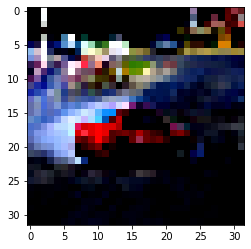

In [18]:
img, label = data_set[20]

plt.imshow(img.permute(1, 2, 0))
class_names[label]

In [19]:
out = model(img.view(-1).unsqueeze(0))
out

tensor([[0.4873, 0.5127]], grad_fn=<SoftmaxBackward>)

In [20]:
_, index = torch.max(out, dim=1)

print('->',class_names[label],' model:',class_names[index])

-> car  model: cat


In [21]:
softmax = nn.Softmax(dim=1)

log_softmax = nn.LogSoftmax(dim=1)

x = torch.tensor([[0.0, 110.0]])

softmax(x)

tensor([[0., 1.]])

In [22]:
torch.log(softmax(x))

tensor([[-inf, 0.]])

In [23]:
log_softmax(x)

tensor([[-110.,    0.]])

In [24]:
torch.exp(log_softmax(x))

tensor([[0., 1.]])

# Implementando un clasificador totalmente conectado
---


In [25]:
model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.LogSoftmax(dim=1))

loss = nn.NLLLoss()

In [26]:
img, label = data_set[20]

out = model(img.view(-1).unsqueeze(0))

_, index = torch.max(out, dim=1)

print('->',class_names[label],' model:',class_names[index])

loss(out, torch.tensor([label]))

-> car  model: cat


tensor(0.9548, grad_fn=<NllLossBackward>)

In [28]:
model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.LogSoftmax(dim=1))
loss_function = nn.NLLLoss()

optimizer = optim.SGD(model.parameters(), lr=0.01) 

n_epoch = 5

for epoch in range(n_epoch):
  for img, label in data_set:
    out = model(img.view(-1).unsqueeze(0))
    loss = loss_function(out, torch.tensor([label]))

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

KeyboardInterrupt: ignored

In [29]:
learning_rate = 0.01

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

lossFunction = nn.NLLLoss()

n_epochs = 5 #100

for epoch in range(n_epochs):
    for img, label in data_set:
        out = model(img.view(-1).unsqueeze(0))
        loss = lossFunction(out, torch.tensor([label]))
                
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 2.164296
Epoch: 1, Loss: 1.914304
Epoch: 2, Loss: 0.169305
Epoch: 3, Loss: 8.030145
Epoch: 4, Loss: 2.237155


In [30]:
train_loader = torch.utils.data.DataLoader(data_set, batch_size=64, shuffle=True)

model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.LogSoftmax(dim=1))


optimizer = optim.SGD(model.parameters(), lr=0.02)

loss_function = nn.NLLLoss()

n_epochs = 100

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss = loss_function(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.670318
Epoch: 1, Loss: 0.385748
Epoch: 2, Loss: 0.548486
Epoch: 3, Loss: 0.381211
Epoch: 4, Loss: 0.214622
Epoch: 5, Loss: 0.428602
Epoch: 6, Loss: 0.292872
Epoch: 7, Loss: 0.208056
Epoch: 8, Loss: 0.352464
Epoch: 9, Loss: 0.411135
Epoch: 10, Loss: 0.325727
Epoch: 11, Loss: 0.209327
Epoch: 12, Loss: 0.277337
Epoch: 13, Loss: 0.136490
Epoch: 14, Loss: 0.214848
Epoch: 15, Loss: 0.105798
Epoch: 16, Loss: 0.156452
Epoch: 17, Loss: 0.118489
Epoch: 18, Loss: 0.093975
Epoch: 19, Loss: 0.103868
Epoch: 20, Loss: 0.107857
Epoch: 21, Loss: 0.075727
Epoch: 22, Loss: 0.049762
Epoch: 23, Loss: 0.056395
Epoch: 24, Loss: 0.038351
Epoch: 25, Loss: 0.082059
Epoch: 26, Loss: 0.049398
Epoch: 27, Loss: 0.128642
Epoch: 28, Loss: 0.016156
Epoch: 29, Loss: 0.022455
Epoch: 30, Loss: 0.124863
Epoch: 31, Loss: 0.010707
Epoch: 32, Loss: 0.029329
Epoch: 33, Loss: 0.010232
Epoch: 34, Loss: 0.013730
Epoch: 35, Loss: 0.014519
Epoch: 36, Loss: 0.030334
Epoch: 37, Loss: 0.008631
Epoch: 38, Loss: 0.010

In [31]:
val_loader = torch.utils.data.DataLoader(validation_set, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]

        correct += int((predicted == labels).sum())
      
print("Accuracy: %f" % (correct / total))

Accuracy: 0.869000


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


->:  car  model: car


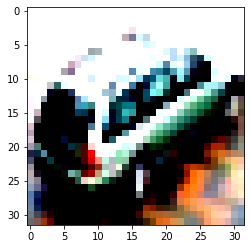

In [38]:
img, label = validation_set[290]
out = model(img.view(-1).unsqueeze(0))
_, index = torch.max(out, dim=1)

print('->: ',class_names[label],' model:',class_names[index])
plt.imshow(img.permute(1, 2, 0))
plt.show()

# Mejoras, limitaciones y conclusiones
---


In [39]:
train_loader = torch.utils.data.DataLoader(data_set, batch_size=64, shuffle=True)

model = nn.Sequential(
            nn.Linear(3072, 1024),
            nn.Tanh(),
            nn.Linear(1024, 512),
            nn.Tanh(),
            nn.Linear(512, 128),
            nn.Tanh(),
            nn.Linear(128, 2))

learning_rate = 0.01

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.CrossEntropyLoss()

n_epochs = 100

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.540227
Epoch: 1, Loss: 0.825430
Epoch: 2, Loss: 0.288531
Epoch: 3, Loss: 0.313770
Epoch: 4, Loss: 0.356877
Epoch: 5, Loss: 0.570342
Epoch: 6, Loss: 0.522826
Epoch: 7, Loss: 0.241356
Epoch: 8, Loss: 0.731054
Epoch: 9, Loss: 0.353543
Epoch: 10, Loss: 0.442409
Epoch: 11, Loss: 0.434550
Epoch: 12, Loss: 0.219393
Epoch: 13, Loss: 0.142431
Epoch: 14, Loss: 0.097737
Epoch: 15, Loss: 0.196367


KeyboardInterrupt: ignored

In [40]:
val_loader = torch.utils.data.DataLoader(validation_set, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Accuracy: 0.849000


In [43]:
train_loader = torch.utils.data.DataLoader(data_set, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Accuracy: 0.911000


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


correct:  car  model: cat


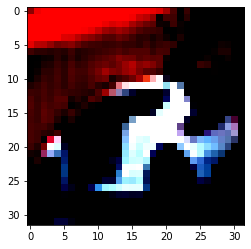

In [44]:
img, label = validation_set[1]
out = model(img.view(-1).unsqueeze(0))
_, index = torch.max(out, dim=1)

print('correct: ',class_names[label],' model:',class_names[index])
plt.imshow(img.permute(1, 2, 0))

In [45]:
sum([p.numel() for p in model.parameters() if p.requires_grad == True])

3737474

In [46]:
first_model = nn.Sequential(
                nn.Linear(3072, 512),
                nn.Tanh(),
                nn.Linear(512, 2),
                nn.LogSoftmax(dim=1))

sum([p.numel() for p in first_model.parameters()])

1574402

In [47]:
sum([p.numel() for p in nn.Linear(3072, 512).parameters()])

1573376

In [49]:
sum([p.numel() for p in nn.Linear(3072, 1024).parameters()])

3146752

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


correct: car   model: cat


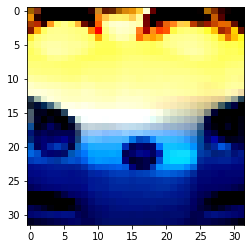

In [50]:
image = request.urlretrieve('https://i.pinimg.com/originals/43/bc/47/43bc47066bb8b2fa4fe7cc8e82cc3714.jpg','test,jpg')
                            
img = Image.open(image[0])

preprocess = transforms.Compose([
        transforms.Resize(48),
        transforms.CenterCrop(32),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.4915, 0.4823, 0.4468],
            std=[0.2470, 0.2435, 0.2616]
        )])

img_t = preprocess(img)
out = model(img_t.view(-1).unsqueeze(0))
_, index = torch.max(out, dim=1)
print('correct: car ',' model:',class_names[index])
plt.imshow(img_t.permute(1, 2, 0))